Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Reading the dataset

In [7]:
df = pd.read_csv(r"E:\Datascience\End to End Projects\Machine Learning\Mushroomclassification\notebook\data\mushrooms.csv")

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
print("dataset shape: ", df.shape)

dataset shape:  (8124, 23)


Visualizing the count of edible and poisonous mushrooms

In [12]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [13]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [14]:
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [15]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(df['class'], palette="prism")
plt.ylabel('Count', fontsize=10)
plt.xlabel('Class', fontsize=10)
plt.title('Number of poisonous/edible mushrooms')
##plt.savefig("mushrooms1.png", format='png', dpi=900)
plt.show()

ValueError: could not convert string to float: 'p'

<Figure size 800x700 with 0 Axes>

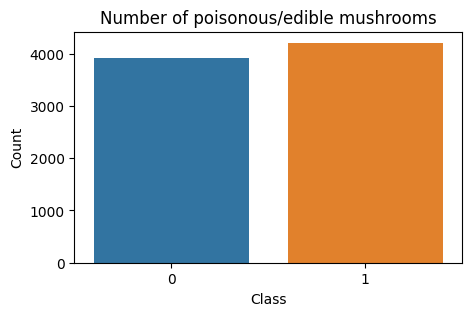

In [98]:
plt.figure(figsize=(5, 3))
hue_order = ['p', 'e']
sns.countplot(data=df['class'], x=df['class'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of poisonous/edible mushrooms')
plt.show()

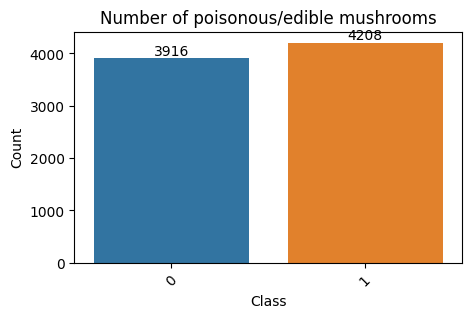

In [99]:
plt.figure(figsize=(5, 3))
hue_order = ['p', 'e']
ax=sns.countplot(data=df['class'], x=df['class'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of poisonous/edible mushrooms')
plt.xticks(rotation=45)  #used for rotating the words in x asis
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
plt.show()

In [100]:
df = df.astype('category')

In [19]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [20]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [21]:
labelencoder = LabelEncoder()
for column in df.columns:
  df[column] = labelencoder.fit_transform(df[column])

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [23]:
df['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1])

In [24]:
df['cap-shape'].value_counts()

cap-shape
5    3656
2    3152
3     828
0     452
4      32
1       4
Name: count, dtype: int64

The column "veil-type" is 0 and not contributing to the data so we remove it

In [25]:
df['veil-type'].value_counts()

veil-type
0    8124
Name: count, dtype: int64

In [26]:
df = df.drop(['veil-type'],axis=1)

In [27]:
df.shape

(8124, 22)

Quick look at the characteristics of the data

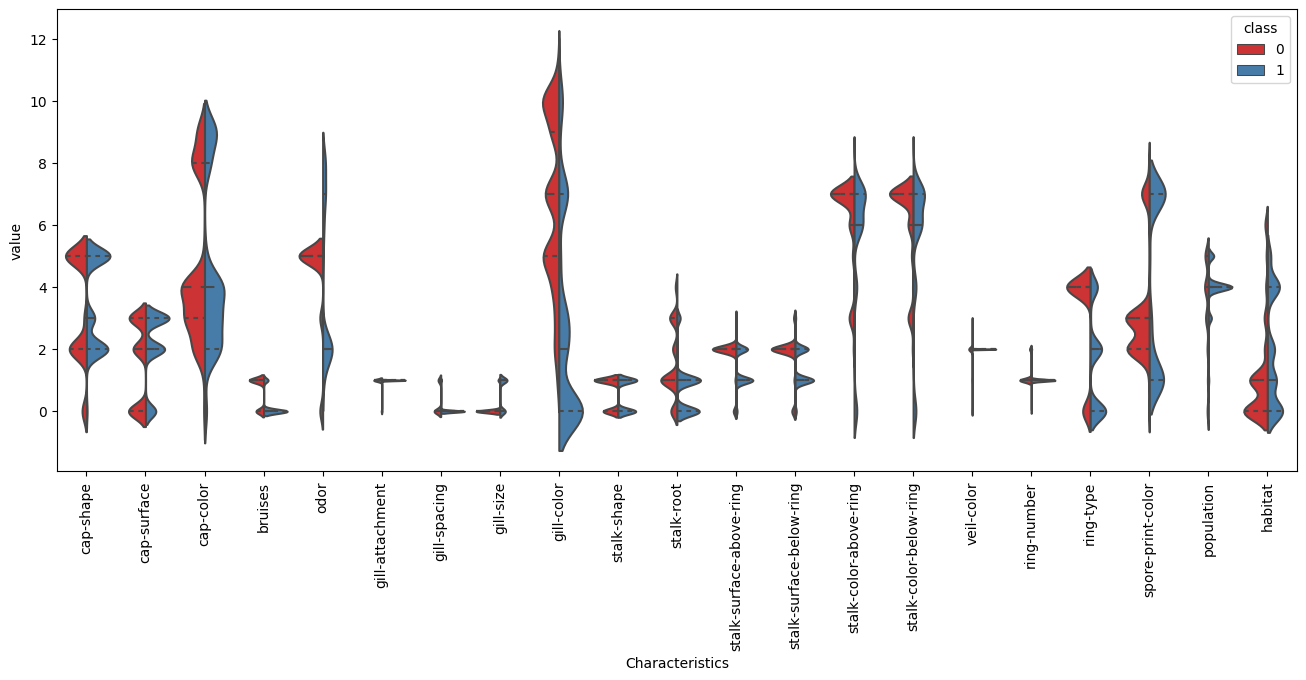

In [28]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

Let's look at the correlation between the variables

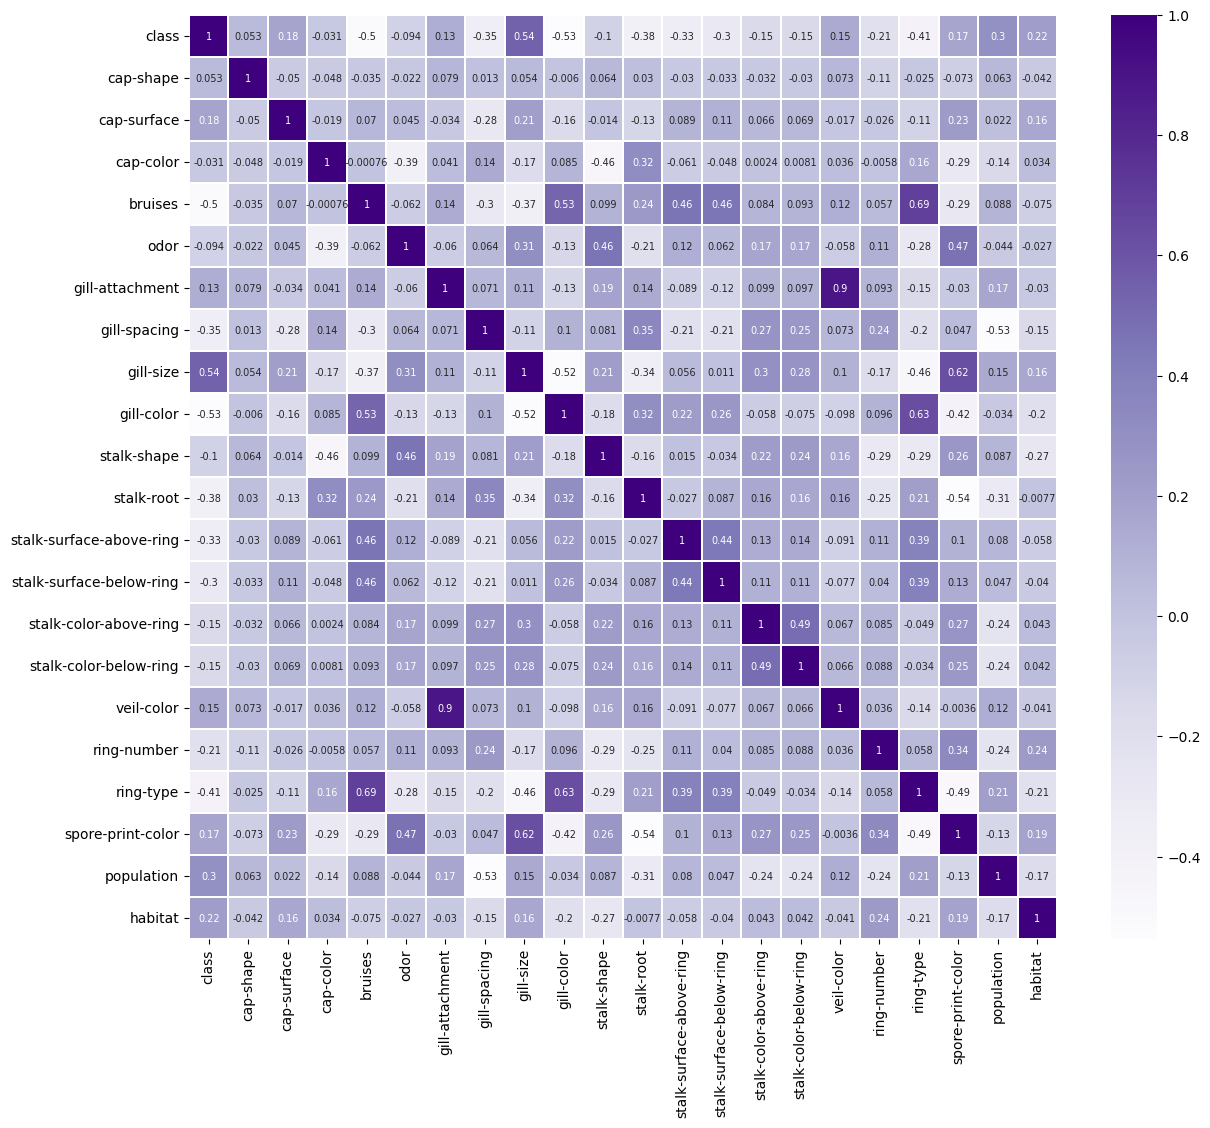

In [29]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely.

In [30]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


Let's look closely at the feature "gill-color"

In [31]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor1.png", format='png', dpi=900, bbox_inches='tight')

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor2.png", format='png', dpi=900, bbox_inches='tight')

Performing train, test split

In [32]:
x = df.drop(['class'], axis = 1)
y = df['class']

In [33]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [34]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

Model Building

1. Decision Tree Classification

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = export_graphviz(dt, out_file=None,
                         feature_names=x.columns,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Feature importance

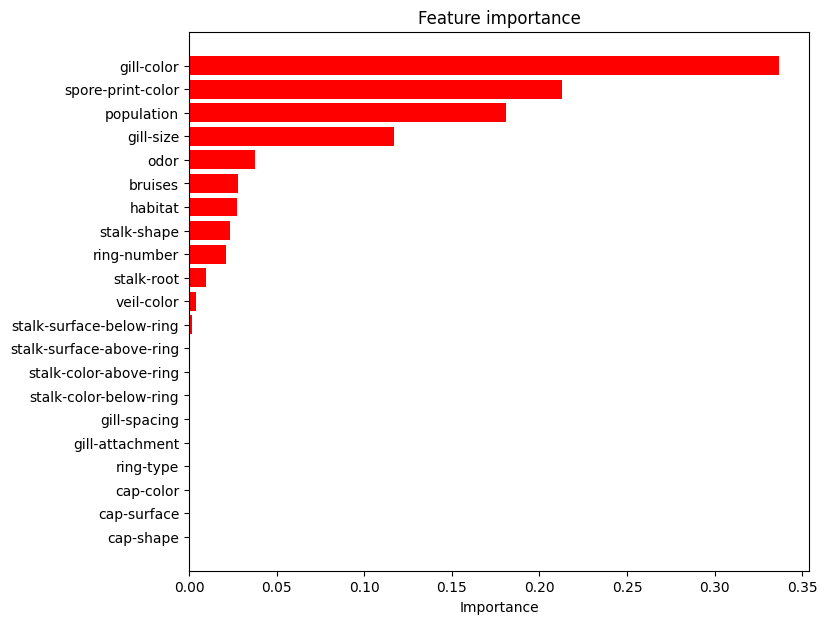

In [38]:
features_list = x.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()


By all methods examined before the feature that is most important is "gill-color".

Predicting and estimating the result

In [39]:
y_pred_dt = dt.predict(x_test)

In [40]:
print("decision tree classifier report: \n\n", classification_report(y_test, y_pred_dt))

decision tree classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [41]:
print("test accuracy: {}%".format(round(dt.score(x_test, y_test)*100,2)))

test accuracy: 100.0%


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print("MSE :", mean_squared_error(y_test, y_pred_dt))
print("MAE :", mean_absolute_error(y_test, y_pred_dt))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

MSE : 0.0
MAE : 0.0
RMSE : 0.0


In [43]:
score = r2_score(y_test, y_pred_dt)

In [44]:
print("R Score : ", score)

R Score :  1.0


In [45]:
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Adjusted R Square:  1.0


Confusion Matrix for Decision Tree Classifier

In [46]:
cm = confusion_matrix(y_test, y_pred_dt)

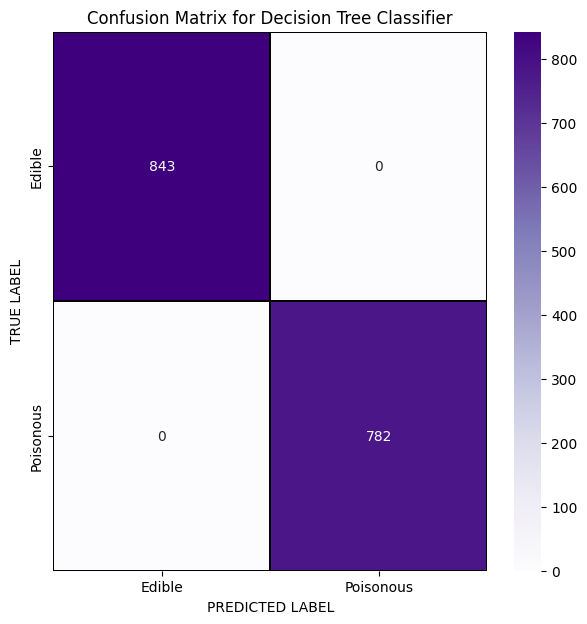

In [47]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

2. Logistic Regression Classification

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Test Accuracy: 94.77%


Classification report of Logistic Regression Classifier

In [49]:
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [50]:
print("MSE: ",mean_squared_error(y_test,y_pred_lr))
print("MAE: ",mean_absolute_error(y_test,y_pred_lr))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
score = r2_score(y_test,y_pred_lr)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MSE:  0.052307692307692305
MAE:  0.052307692307692305
RMSE:  0.22870874995874624
R Square:  0.7904739800918047
Adjusted R Square:  0.7877290977349288


Confusion Matrix for Logistic Regression Classifier

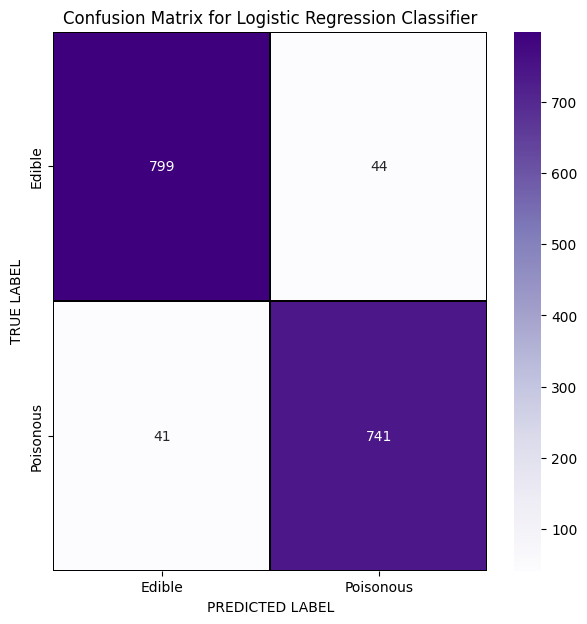

In [51]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

3. KNN Classification

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(knn.score(x_test, y_test)*100,2)))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

Classification report of KNN Classifier

In [53]:
y_pred_knn = knn.predict(x_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
print("MSE: ",mean_squared_error(y_test,y_pred_knn))
print("MAE: ",mean_absolute_error(y_test,y_pred_knn))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
score = r2_score(y_test,y_pred_knn)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Confusion Matrix for KNN Classifier

In [54]:
cm = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

NameError: name 'y_pred_knn' is not defined

4. SVM Classification

In [58]:
from sklearn.svm import SVC


svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


Classification report of SVM Classifier

In [59]:
y_pred_svm = svm.predict(x_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [60]:
print("MSE: ",mean_squared_error(y_test,y_pred_svm))
print("MAE: ",mean_absolute_error(y_test,y_pred_svm))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_svm)))
score = r2_score(y_test,y_pred_svm)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


Confusion Matrix for SVM Classifier

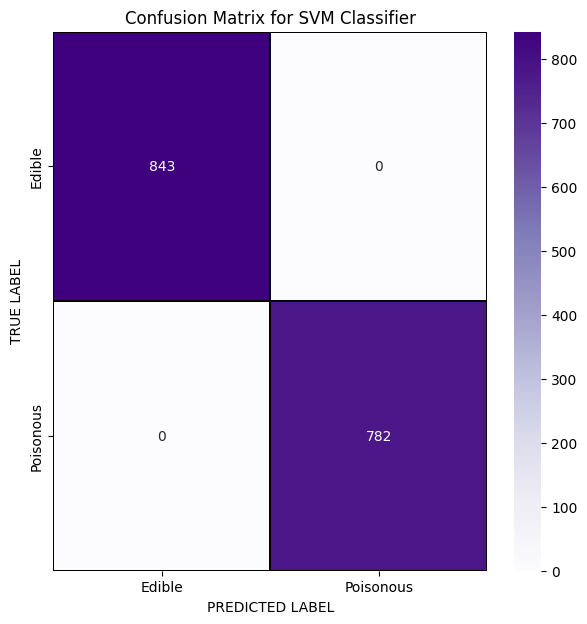

In [61]:
cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

5. Naive Bayes Classification

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100, 2)))

Test Accuracy: 92.18%


Classification report of Naive Bayes Classifier

In [63]:
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



In [64]:
print("MSE: ",mean_squared_error(y_test,y_pred_nb))
print("MAE: ",mean_absolute_error(y_test,y_pred_nb))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_nb)))
score = r2_score(y_test,y_pred_nb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MSE:  0.07815384615384616
MAE:  0.07815384615384616
RMSE:  0.2795600939938427
R Square:  0.6869434761371669
Adjusted R Square:  0.6828422989686582


Confusion Matrix for Naive Bayes Classifier

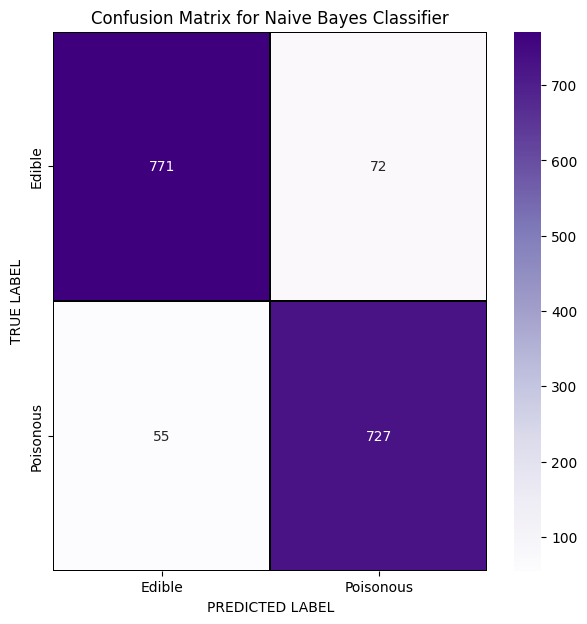

In [65]:
cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

6. Random Forest Classification

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


Classification report of Random Forest Classifier

In [68]:
y_pred_rf = rf.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [69]:
print("MSE: ",mean_squared_error(y_test,y_pred_rf))
print("MAE: ",mean_absolute_error(y_test,y_pred_rf))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
score = r2_score(y_test,y_pred_rf)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


Confusion Matrix for Random Forest Classifier

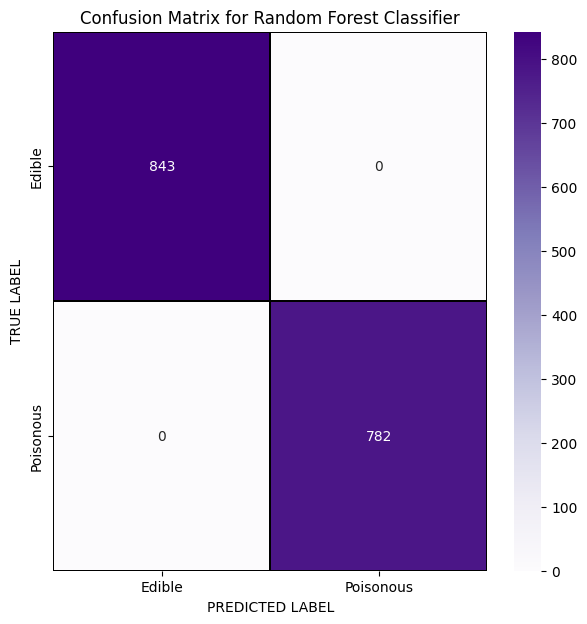

In [70]:
cm = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

7. XGBoost Classification

In [71]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:
from xgboost import XGBClassifier

In [72]:
import xgboost as xb

In [77]:
xb = XGBClassifier()
xb = xb.fit(x_train, y_train)
y_pred_xb = xb.predict(x_test)
print("Test Accuracy: {}%".format(round(xb.score(x_test, y_test)*100,2)))

Test Accuracy: 100.0%


Classification report of XGBoost Classifier

In [78]:
print("XGBoost Classifier report: \n\n", classification_report(y_test, y_pred_xb))

XGBoost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [79]:
print("MSE: ",mean_squared_error(y_test,y_pred_xb))
print("MAE: ",mean_absolute_error(y_test,y_pred_xb))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_xb)))
score = r2_score(y_test,y_pred_xb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


Confusion Matrix for XGBoost Classifier

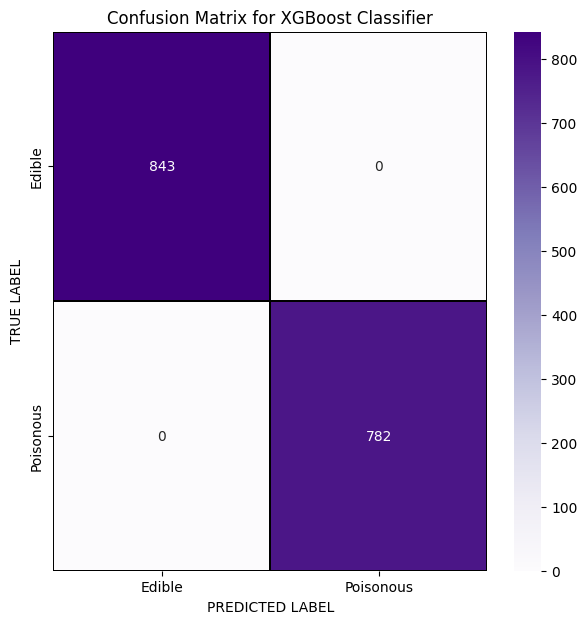

In [80]:
cm = confusion_matrix(y_test, y_pred_xb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBoost Classifier')
#plt.savefig("xbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

8. Gradient Boost Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb = GradientBoostingClassifier()
gb = gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print("Test Accuracy: {}%".format(round(gb.score(x_test, y_test)*100,2)))

Test Accuracy: 100.0%


Classification report of GradientBoost Classifier

In [83]:
print("Gradient Boost Classifier report: \n\n", classification_report(y_test, y_pred_gb))

Gradient Boost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [84]:
print("MSE: ",mean_squared_error(y_test,y_pred_gb))
print("MAE: ",mean_absolute_error(y_test,y_pred_gb))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_gb)))
score = r2_score(y_test,y_pred_gb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


Confusion Matrix for Gradient Boost Classifier

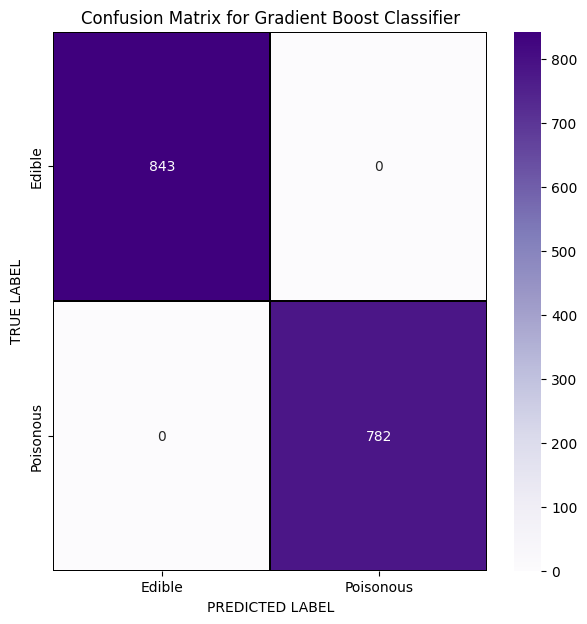

In [85]:
cm = confusion_matrix(y_test, y_pred_gb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boost Classifier')
#plt.savefig("gbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

9. Cat Boost Classification

In [86]:
pip install catboost

In [87]:
from catboost import CatBoostClassifier

In [88]:
cb = CatBoostClassifier(verbose=False)
cb = cb.fit(x_train, y_train)
y_pred_cb = cb.predict(x_test)
print("Test Accuracy: {}%".format(round(cb.score(x_test, y_test)*100,2)))

Test Accuracy: 100.0%


Classification report of Cat Boost Classifier

In [89]:
print("Cat Boost Classifier report: \n\n", classification_report(y_test, y_pred_cb))

Cat Boost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [90]:
print("MSE: ",mean_squared_error(y_test,y_pred_cb))
print("MAE: ",mean_absolute_error(y_test,y_pred_cb))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_cb)))
score = r2_score(y_test,y_pred_cb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


Confusion Matrix for Cat Boost Classifier

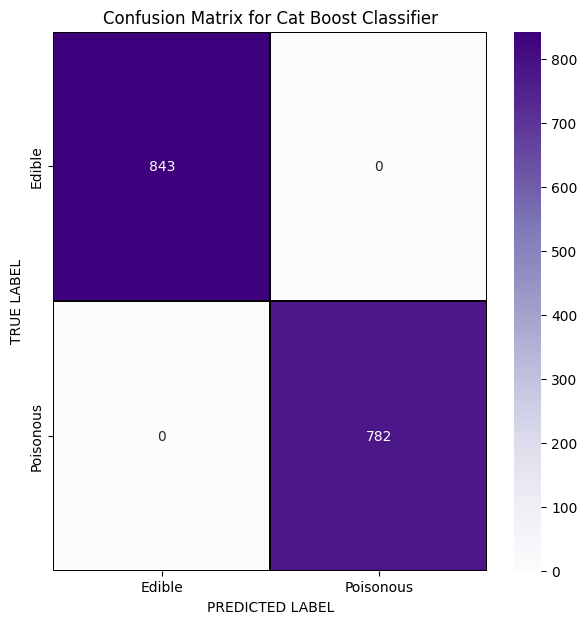

In [91]:
cm = confusion_matrix(y_test, y_pred_cb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Cat Boost Classifier')
#plt.savefig("cbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

10. AdaBoost Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
adb = AdaBoostClassifier()
adb = adb.fit(x_train, y_train)
y_pred_adb = adb.predict(x_test)
print("Test Accuracy: {}%".format(round(adb.score(x_test, y_test)*100,2)))

Test Accuracy: 100.0%


In [94]:
print("MSE: ",mean_squared_error(y_test,y_pred_adb))
print("MAE: ",mean_absolute_error(y_test,y_pred_adb))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_adb)))
score = r2_score(y_test,y_pred_adb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


Confusion Matrix for AdaBoost Classifier

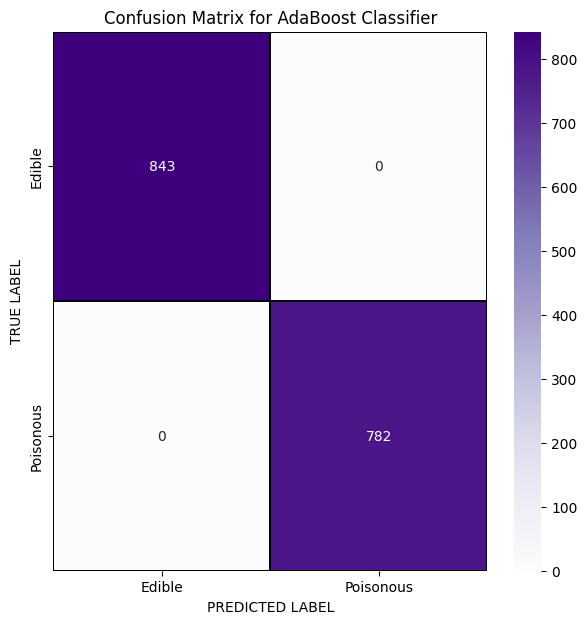

In [95]:
cm = confusion_matrix(y_test, y_pred_adb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier')
#plt.savefig("adbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [97]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Test Accuracy"]
pt.add_row(["DecisionTreeClassifier","100"])
pt.add_row(["LogisticRegression","94.77"])
pt.add_row(["KNeighborsClassifier","99.63"])
pt.add_row(["SVC","100"])
pt.add_row(["GaussianNB","92.18"])
pt.add_row(["RandomForestClassifier","100"])
pt.add_row(["XGBClassifier","100"])
pt.add_row(["GradientBoostingClassifier","100"])
pt.add_row(["CatBoostClassifier","100"])
pt.add_row(["AdaBoostClassifier","100"])
print(pt)

ModuleNotFoundError: No module named 'prettytable'

Conclusion:

From the confusion matrix, we saw that our train and test data is balanced.

Most of the classification methods hit 100% accuracy with this dataset.

Save Model

In [ ]:
#import pickle
#pickle.dump(nb, open('model_nb.pkl','wb'))